In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

<li>case - Номер наблюдения
<li>site - Номер участка, где был пойман в ловушку опоссум.
<li>pop - Население  Vic(Виктория) или other(Новый Южный Уэльс или Квинсленд).
<li>sex - m (мужской) или f (женский).
<li>age - возраст.
<li>hdlngth - Длина головы, мм.
<li>skullw - Ширина черепа, в мм.
<li>totlngth - Общая длина, в сантиметрах.
<li>taill - Длина хвоста, в сантиметрах.
<li>footlgth - Длина стопы
<li>earconch - Длина ушной раковины
<li>eye - Расстояние от медиального выступа до латерального выступа правого глаза
<li>chest - Обхват груди (в см).
<li>belly - Обхват живота (в см).

In [120]:
data = pd.read_csv('possum.csv')
data.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [121]:
print(data['Pop'].unique())
print(data['site'].unique())
print(data['age'].unique())

['Vic' 'other']
[1 2 3 4 5 6 7]
[ 8.  6.  2.  1.  9.  5.  3.  4.  7. nan]


In [122]:
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['footlgth'].fillna(data['footlgth'].mean(), inplace=True)

In [123]:
data.drop(columns='case', inplace=True)

In [124]:
labelencoder = LabelEncoder()

data['sex'] = labelencoder.fit_transform(data['sex'])
data['Pop'] = labelencoder.fit_transform(data['Pop'])

# Разделение на кластеры по всем признакам, кроме пола

In [168]:
scaler = StandardScaler()

data_scaled = data.copy()
columns_to_scale = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'age', 'Pop', 'site']
for column in columns_to_scale:
    data_scaled[column] = scaler.fit_transform(data[[column]])

data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,-1.122867,-1.122884,1,2.218955,0.420996,1.134883,0.445603,-0.517732,1.387779,1.557431,0.147177,0.491222,1.241874
1,-1.122867,-1.122884,0,1.157937,-0.028932,0.231197,1.028384,-0.261331,0.928309,0.750501,0.912499,0.736833,0.150424
2,-1.122867,-1.122884,0,1.157937,0.392875,1.005785,1.960834,1.020671,1.594541,0.921668,0.434173,1.473667,0.514241
3,-1.122867,-1.122884,0,1.157937,0.167912,0.069825,1.144941,0.507870,1.755355,0.995025,0.147177,0.491222,0.514241
4,-1.122867,-1.122884,0,-0.964098,-0.310136,-0.188371,-0.370290,-0.517732,0.583706,1.239549,0.051512,0.736833,0.150424


In [169]:
data_scaled.drop(columns=['sex'], inplace=True)

In [170]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(data_scaled)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
data_PCA = pca.fit_transform(data_scaled)
print(n_components)

2


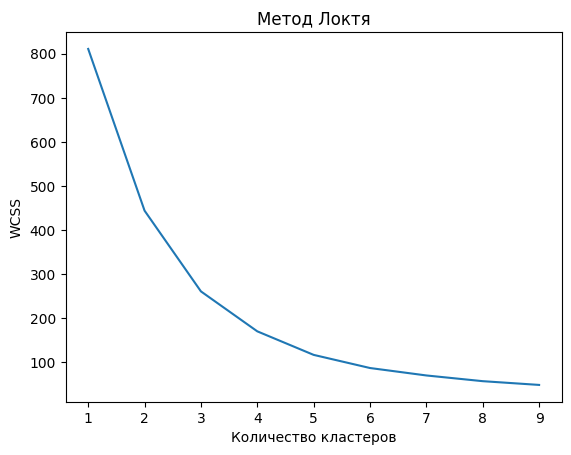

In [171]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

# Для двух кластеров

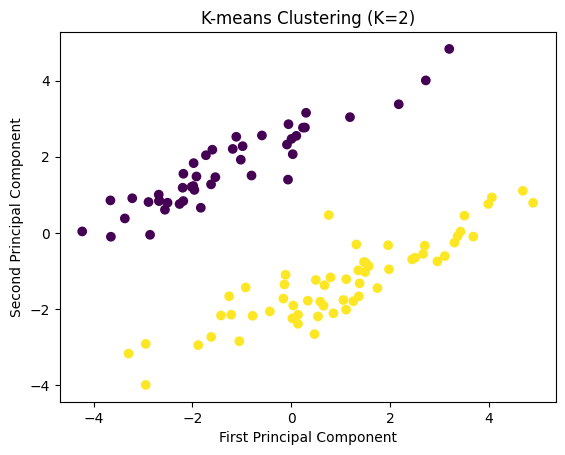

In [139]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

In [140]:
silhouette_kmeans = silhouette_score(data_PCA, kmeans.labels_)
print("Silhouette Score:", silhouette_kmeans)

db_index_kmeans = davies_bouldin_score(data_PCA, kmeans.labels_)
print("Davies-Bouldin Index:", db_index_kmeans)

ch_index_kmeans = calinski_harabasz_score(data_PCA, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index_kmeans)

Silhouette Score: 0.4837926546117153
Davies-Bouldin Index: 0.8904156748604862
Calinski-Harabasz Index: 84.3136550609083


# Для 4 кластеров

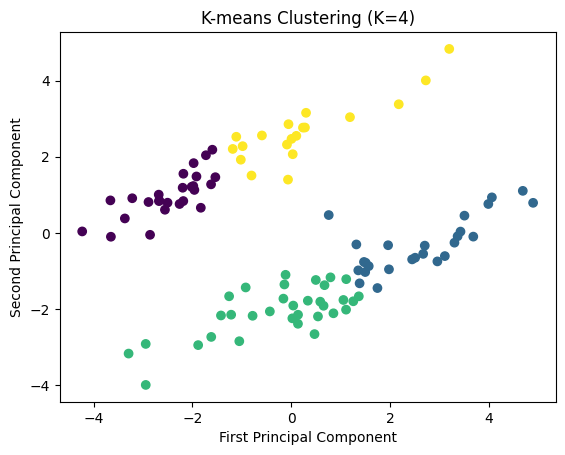

In [141]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

In [142]:
silhouette_kmeans = silhouette_score(data_PCA, kmeans.labels_)
print("Silhouette Score:", silhouette_kmeans)

db_index_kmeans = davies_bouldin_score(data_PCA, kmeans.labels_)
print("Davies-Bouldin Index:", db_index_kmeans)

ch_index_kmeans = calinski_harabasz_score(data_PCA, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index_kmeans)

Silhouette Score: 0.49110727792974995
Davies-Bouldin Index: 0.6451608335789936
Calinski-Harabasz Index: 125.54789920801943


# Для 3 кластеров

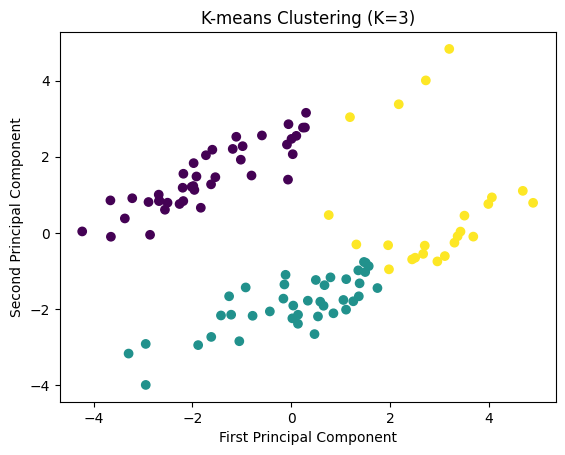

In [143]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

In [144]:
silhouette_kmeans = silhouette_score(data_PCA, kmeans.labels_)
print("Silhouette Score:", silhouette_kmeans)

db_index_kmeans = davies_bouldin_score(data_PCA, kmeans.labels_)
print("Davies-Bouldin Index:", db_index_kmeans)

ch_index_kmeans = calinski_harabasz_score(data_PCA, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index_kmeans)

Silhouette Score: 0.49103872250514424
Davies-Bouldin Index: 0.7349525253736685
Calinski-Harabasz Index: 106.53128452153642


# DBSCAN с eps=0.8 кластеров

In [174]:
dbscan = DBSCAN(eps=1.0, min_samples=5)
cluster = dbscan.fit_predict(data_PCA)

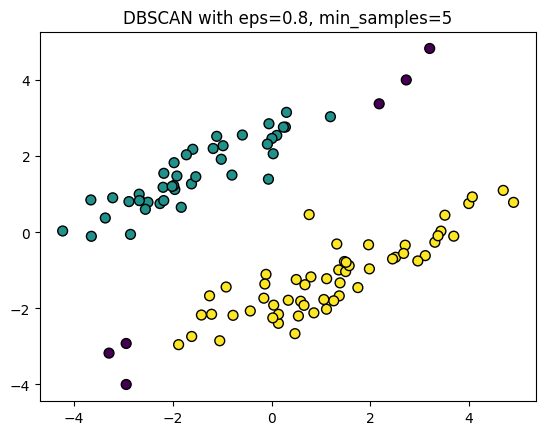

In [175]:
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=cluster, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('DBSCAN with eps=0.8, min_samples=5')
plt.show()

In [176]:
silhouette_dbscan = silhouette_score(data_PCA, dbscan.labels_)
print("Silhouette Score:", silhouette_dbscan)

db_index_dbscan = davies_bouldin_score(data_PCA, dbscan.labels_)
print("Davies-Bouldin Index:", db_index_dbscan)

ch_index_dbscan = calinski_harabasz_score(data_PCA, dbscan.labels_)
print("Calinski-Harabasz Index:", ch_index_dbscan)

Silhouette Score: 0.4910403283111757
Davies-Bouldin Index: 3.1909063296597946
Calinski-Harabasz Index: 42.43581865156538


# DBSCAN для разных eps

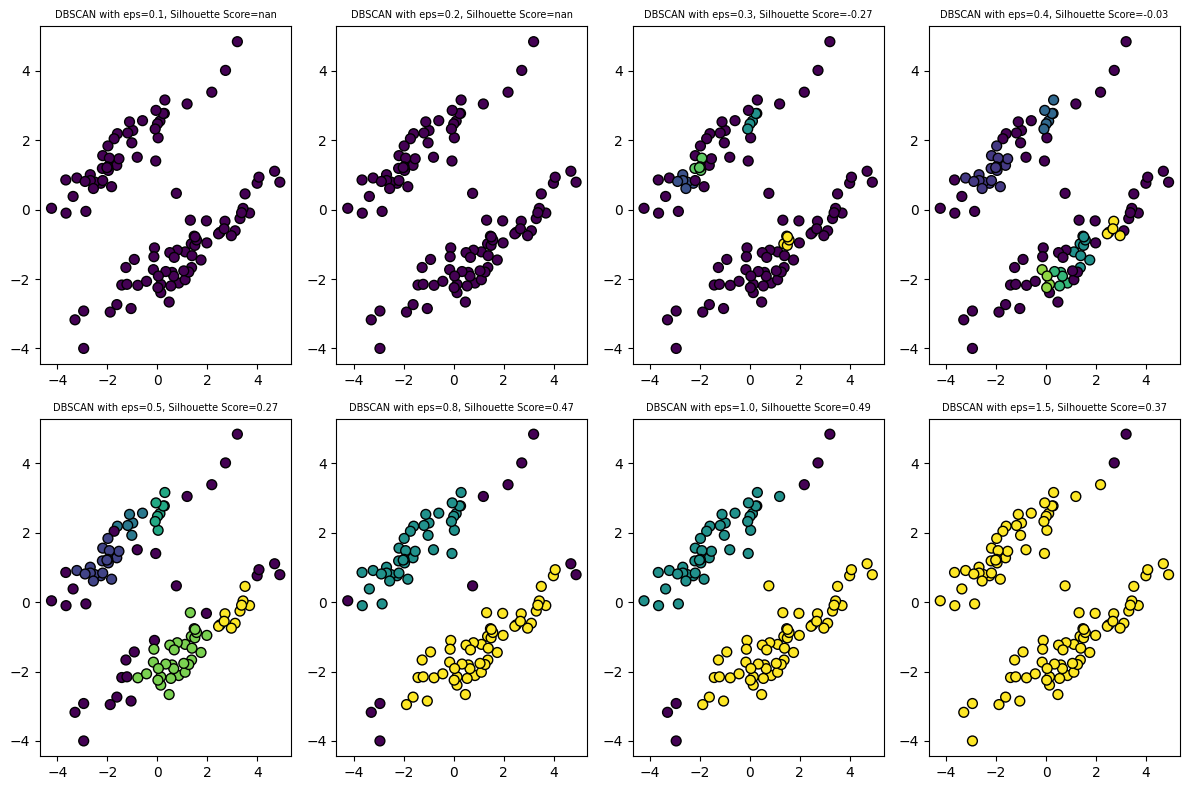

In [150]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 1.5] 

plt.figure(figsize=(12, 8))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster = dbscan.fit_predict(data_PCA)
    unique_labels = np.unique(cluster)
    if len(unique_labels) > 1:
        silhouette_dbscan = silhouette_score(data_PCA, cluster)
    else:
        silhouette_dbscan = np.nan
    plt.subplot(2, 4, i+1)
    plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=cluster, cmap="viridis", marker='o', edgecolor='black', s=50)
    plt.title(f'DBSCAN with eps={eps}, Silhouette Score={silhouette_dbscan:.2f}', fontsize=7)
plt.tight_layout()
plt.show()

### Лучшее значение метрики при eps = 1.0

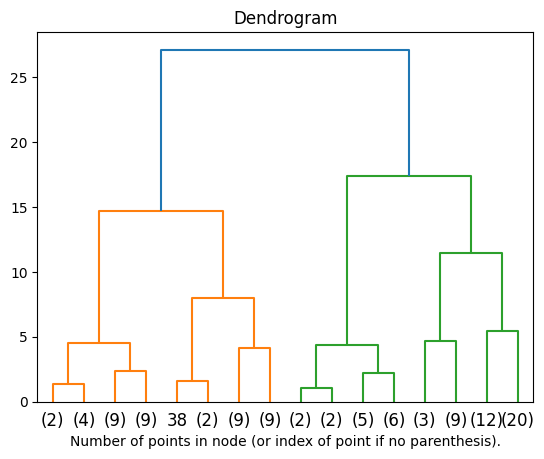

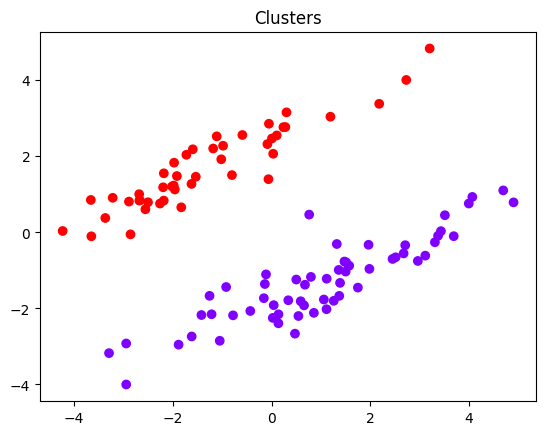

In [153]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(data_PCA)

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.title('Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

model = AgglomerativeClustering(n_clusters=2)
model = model.fit(data_PCA)
plt.scatter(data_PCA[:, 0], data_PCA[:, 1], c=model.labels_, cmap='rainbow')
plt.title('Clusters')
plt.show()

In [154]:
silhouette_dend = silhouette_score(data_PCA, model.labels_)
print("Silhouette Score:", silhouette_dend)

db_index_dend = davies_bouldin_score(data_PCA, model.labels_)
print("Davies-Bouldin Index:", db_index_dend)

ch_index_dend = calinski_harabasz_score(data_PCA, model.labels_)
print("Calinski-Harabasz Index:", ch_index_dend)

Silhouette Score: 0.4837926546117153
Davies-Bouldin Index: 0.8904156748604862
Calinski-Harabasz Index: 84.3136550609083


# Разделение с помощью MinMaxScaler

In [177]:
scaler_m = MinMaxScaler()

data_scaled_m = data.copy()
columns_to_scale = ['hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'age', 'Pop', 'site','sex']
for column in columns_to_scale:
    data_scaled_m[column] = scaler_m.fit_transform(data[[column]])

data_scaled_m = pd.DataFrame(data_scaled_m, columns=data.columns)
data_scaled_m.head()

,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0.0,0.0,1.0,0.875,0.563107,0.559140,0.651163,0.363636,0.806818,0.893082,0.48,0.60,0.733333
1,0.0,0.0,0.0,0.625,0.485437,0.408602,0.767442,0.409091,0.693182,0.685535,0.64,0.65,0.533333
2,0.0,0.0,0.0,0.625,0.558252,0.537634,0.953488,0.636364,0.857955,0.729560,0.54,0.80,0.600000
3,0.0,0.0,0.0,0.625,0.519417,0.381720,0.790698,0.545455,0.897727,0.748428,0.48,0.60,0.600000
4,0.0,0.0,0.0,0.125,0.436893,0.338710,0.488372,0.363636,0.607955,0.811321,0.46,0.65,0.533333


In [178]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(data_scaled_m)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
data_PCA_m = pca.fit_transform(data_scaled_m)
print(n_components)

3


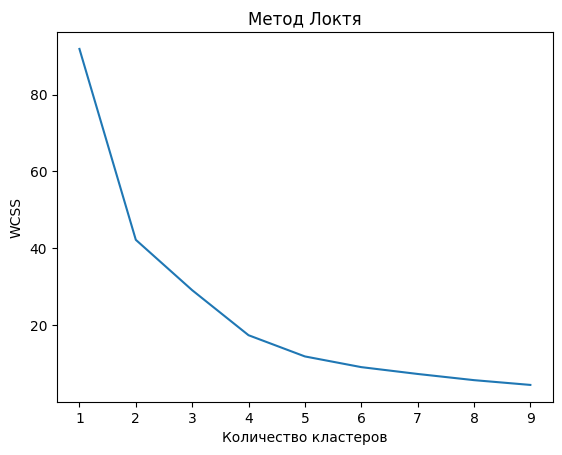

In [179]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA_m)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia)
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.title('Метод Локтя')
plt.show()

# KMeans для 4 кластеров

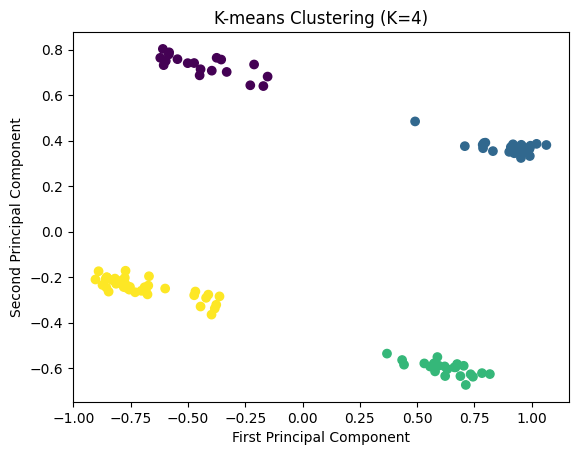

In [180]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA_m)
plt.scatter(data_PCA_m[:, 0], data_PCA_m[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

In [181]:
silhouette_kmeans = silhouette_score(data_PCA_m, kmeans.labels_)
print("Silhouette Score:", silhouette_kmeans)

db_index_kmeans = davies_bouldin_score(data_PCA_m, kmeans.labels_)
print("Davies-Bouldin Index:", db_index_kmeans)

ch_index_kmeans = calinski_harabasz_score(data_PCA_m, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index_kmeans)

Silhouette Score: 0.579544893941371
Davies-Bouldin Index: 0.6492638490883798
Calinski-Harabasz Index: 142.14211510949613


# KMeans для 2 кластеров

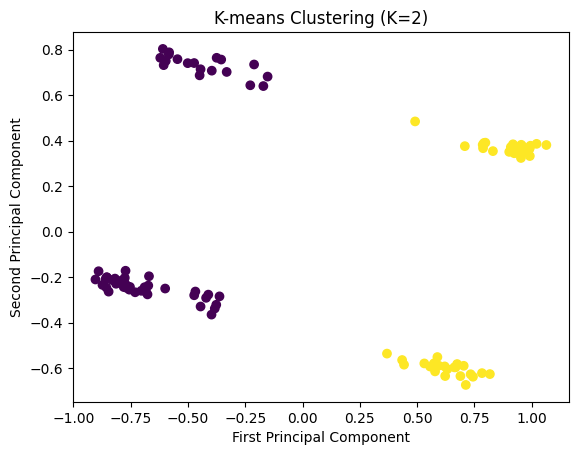

Silhouette Score: 0.5054104293519308
Davies-Bouldin Index: 0.8841005591931913
Calinski-Harabasz Index: 119.78950773659038


In [182]:
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42).fit(data_PCA_m)
plt.scatter(data_PCA_m[:, 0], data_PCA_m[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()

silhouette_kmeans = silhouette_score(data_PCA_m, kmeans.labels_)
print("Silhouette Score:", silhouette_kmeans)

db_index_kmeans = davies_bouldin_score(data_PCA_m, kmeans.labels_)
print("Davies-Bouldin Index:", db_index_kmeans)

ch_index_kmeans = calinski_harabasz_score(data_PCA_m, kmeans.labels_)
print("Calinski-Harabasz Index:", ch_index_kmeans)

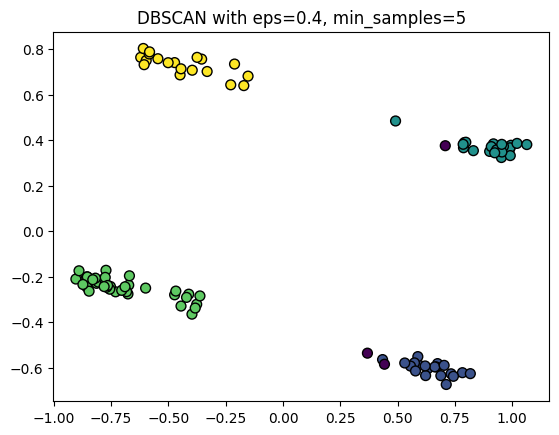

In [187]:
dbscan = DBSCAN(eps=0.4, min_samples=5)
cluster = dbscan.fit_predict(data_PCA_m)
plt.scatter(data_PCA_m[:, 0], data_PCA_m[:, 1], c=cluster, cmap="viridis", marker='o', edgecolor='black', s=50)
plt.title('DBSCAN with eps=0.4, min_samples=5')
plt.show()

In [188]:
silhouette_dbscan = silhouette_score(data_PCA_m, dbscan.labels_)
print("Silhouette Score:", silhouette_dbscan)

db_index_dbscan = davies_bouldin_score(data_PCA_m, dbscan.labels_)
print("Davies-Bouldin Index:", db_index_dbscan)

ch_index_dbscan = calinski_harabasz_score(data_PCA_m, dbscan.labels_)
print("Calinski-Harabasz Index:", ch_index_dbscan)

Silhouette Score: 0.5769266034852516
Davies-Bouldin Index: 0.6697683613522882
Calinski-Harabasz Index: 121.79771465017568


# DBSCAN с разными eps

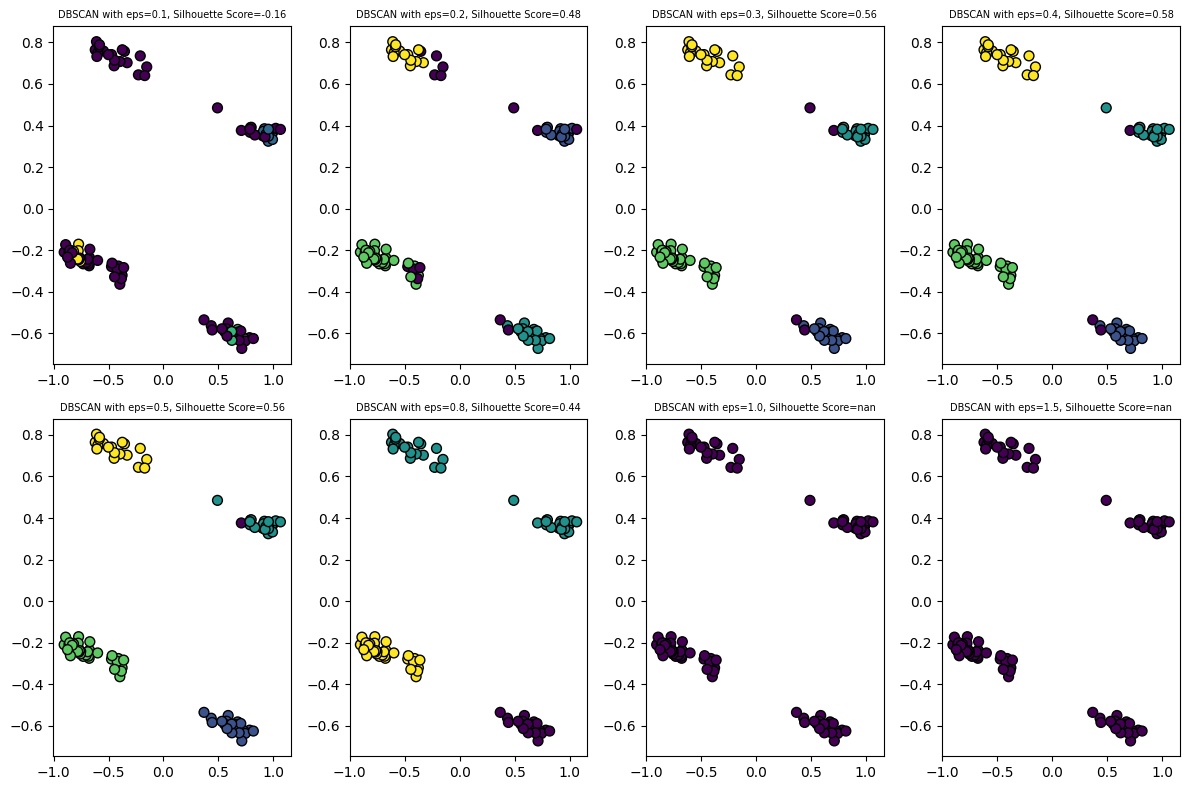

In [186]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1.0, 1.5] 

plt.figure(figsize=(12, 8))

for i, eps in enumerate(eps_values):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    cluster = dbscan.fit_predict(data_PCA_m)
    unique_labels = np.unique(cluster)
    if len(unique_labels) > 1:
        silhouette_dbscan = silhouette_score(data_PCA_m, cluster)
    else:
        silhouette_dbscan = np.nan
    plt.subplot(2, 4, i+1)
    plt.scatter(data_PCA_m[:, 0], data_PCA_m[:, 1], c=cluster, cmap="viridis", marker='o', edgecolor='black', s=50)
    plt.title(f'DBSCAN with eps={eps}, Silhouette Score={silhouette_dbscan:.2f}', fontsize=7)
plt.tight_layout()
plt.show()

### Наибольшее значение метрики с eps=0.4

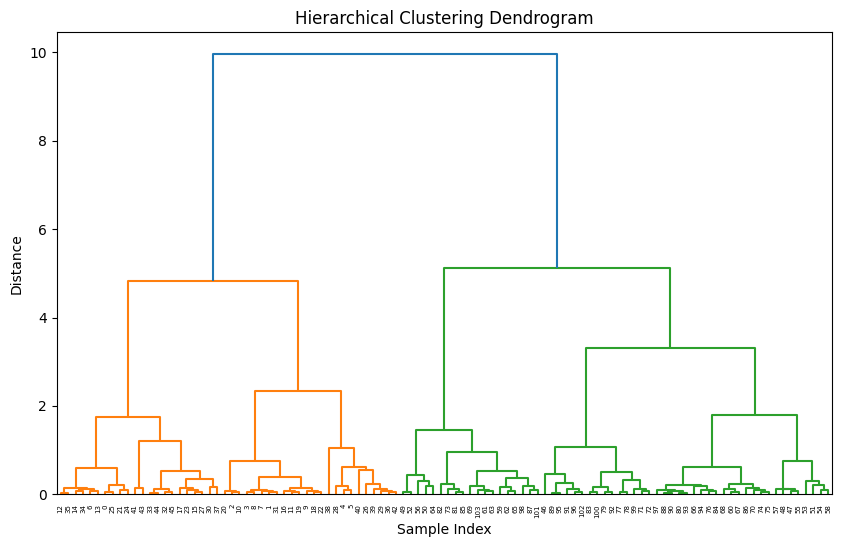

In [163]:
Z = linkage(data_PCA_m, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# AgglomerativeClustering для 4 кластеров

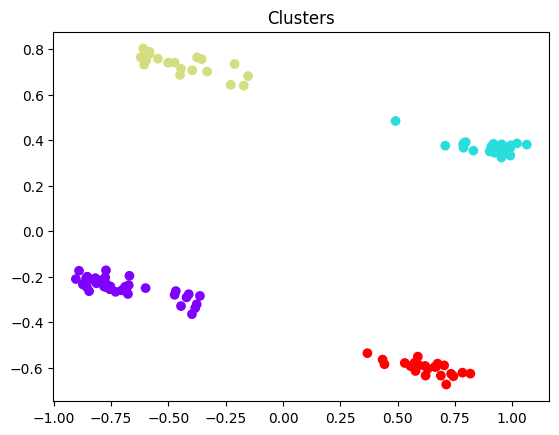

In [164]:
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(data_PCA_m)
plt.scatter(data_PCA_m[:, 0], data_PCA_m[:, 1], c=model.labels_, cmap='rainbow')
plt.title('Clusters')
plt.show()

In [165]:
silhouette_dend = silhouette_score(data_PCA_m, model.labels_)
print("Silhouette Score:", silhouette_dend)

db_index_dend = davies_bouldin_score(data_PCA_m, model.labels_)
print("Davies-Bouldin Index:", db_index_dend)

ch_index_dend = calinski_harabasz_score(data_PCA_m, model.labels_)
print("Calinski-Harabasz Index:", ch_index_dend)

Silhouette Score: 0.579544893941371
Davies-Bouldin Index: 0.6492638490883798
Calinski-Harabasz Index: 142.14211510949613


# AgglomerativeClustering для 2 кластеров

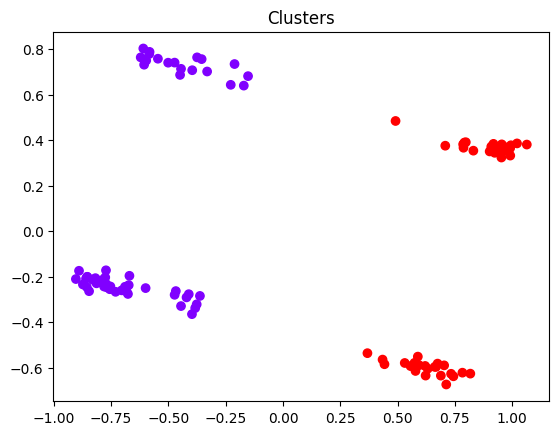

Silhouette Score: 0.5054104293519308
Davies-Bouldin Index: 0.8841005591931913
Calinski-Harabasz Index: 119.78950773659038


In [167]:
model = AgglomerativeClustering(n_clusters=2)
model = model.fit(data_PCA_m)
plt.scatter(data_PCA_m[:, 0], data_PCA_m[:, 1], c=model.labels_, cmap='rainbow')
plt.title('Clusters')
plt.show()


silhouette_dend = silhouette_score(data_PCA_m, model.labels_)
print("Silhouette Score:", silhouette_dend)

db_index_dend = davies_bouldin_score(data_PCA_m, model.labels_)
print("Davies-Bouldin Index:", db_index_dend)

ch_index_dend = calinski_harabasz_score(data_PCA_m, model.labels_)
print("Calinski-Harabasz Index:", ch_index_dend)

### Без учета пола визуально получилось 2 кластера, а с учетом пола - 4. Получается, что без учета пола кластеризация делит данные на некоторые 2 вида опоссумов, а с учетом пола вероятно, что делит мужской пол и женский пол на 2 кластера, то есть возможно это связь с другими характеристиками опоссума.

# Вариант 1. НАИЛУЧШИЕ МЕТРИКИ ВЫДЕЛЕНЫ
### KMeans для 2
<li>Silhouette Score: 0.4837926546117153
<li>Davies-Bouldin Index: 0.8904156748604862
<li>Calinski-Harabasz Index: 84.3136550609083

### KMeans для 3
<li>Silhouette Score: 0.49103872250514424
<li>Davies-Bouldin Index: 0.7349525253736685
<li>Calinski-Harabasz Index: 106.53128452153642

### KMeans для 4
<li><strong>Silhouette Score: 0.49110727792974995</strong>
<li><strong>Davies-Bouldin Index: 0.6451608335789936</strong>
<li><strong>Calinski-Harabasz Index: 125.54789920801943</strong>

### DBSCAN c eps=1.0
<li>Silhouette Score: 0.4910403283111757
<li>Davies-Bouldin Index: 3.1909063296597946
<li>Calinski-Harabasz Index: 42.43581865156538

### AgglomerativeClustering для 2 кластеров
<li>Silhouette Score: 0.4837926546117153
<li>Davies-Bouldin Index: 0.8904156748604862
<li>Calinski-Harabasz Index: 84.3136550609083

# Вариант 2
### KMeans для 4 кластеров
<li><strong>Silhouette Score: 0.579544893941371</strong>
<li><strong>Davies-Bouldin Index: 0.6492638490883798</strong>
<li><strong>Calinski-Harabasz Index: 142.14211510949613</strong>

### KMeans для 2 кластеров
<li>Silhouette Score: 0.5054104293519308
<li>Davies-Bouldin Index: 0.8841005591931913
<li>Calinski-Harabasz Index: 119.78950773659038

### DBSCAN c eps = 0.4
<li>Silhouette Score: 0.5769266034852516
<li>Davies-Bouldin Index: 0.6697683613522882
<li>Calinski-Harabasz Index: 121.79771465017568

### AgglomerativeClustering для 2 кластеров
<li>Silhouette Score: 0.5054104293519308
<li>Davies-Bouldin Index: 0.8841005591931913
<li>Calinski-Harabasz Index: 119.78950773659038

### AgglomerativeClustering для 4 кластеров
<li><strong>Silhouette Score: 0.579544893941371</strong>
<li><strong>Davies-Bouldin Index: 0.6492638490883798</strong>
<li><strong>Calinski-Harabasz Index: 142.14211510949613</strong>

## <strong>Таким образом, в первом случае лучшие значения метрик оказались у метода kmeans. Во втором случае у методов kmeans и agglomerativeclustering. Дело в том, что данные разделимые, особенно во втором случае в виде "облаков", а такие разделения kmeans "любит", поэтому лучшим в данной задаче оказался этот метод.</strong>

### Одинаковые значения метрик могут означать, что данные хорошо разделимы и методы одинаково хорошо справились с разделением.
#### Silhouette Score: Эта метрика количественно измеряет, насколько объекты в кластерах похожи друг на друга и насколько они отличаются от объектов в других кластерах. Значения силуэта близкие к 1 указывают на хорошую кластеризацию, где объекты находятся близко к центру своего кластера и далеко от объектов других кластеров. Значения близкие к 0 могут указывать на перекрывающиеся кластеры, а отрицательные значения обычно указывают на неправильную кластеризацию.
#### Davies-Bouldin Index: Эта метрика оценивает среднее расстояние между центроидами кластеров, относительно среднего расстояния внутри кластеров. Меньшие значения индекса указывают на лучшую кластеризацию.
#### Calinski-Harabasz Index: Эта метрика также измеряет компактность и разделение кластеров, используя дисперсию внутри кластеров и межкластерное расстояние. Большие значения индекса указывают на лучшую кластеризацию.